In [1]:
%matplotlib inline

import newspaper
from newspaper import Article, Config
import glob
import json
import pandas as pd
import numpy as np
from IPython.core.debugger import set_trace
from pathlib import Path
from tqdm.auto import tqdm
tqdm.pandas()

In [2]:
fnames = glob.glob('newsdata/downloaded/*.json')

# 일별 발행갯수 추이

In [9]:
publish_count = {}

for fname in tqdm(fnames):
    js = json.loads(Path(fname).read_text())
    pub = js['pub']
    published_at = js['published_at']

    if pub not in publish_count:
        publish_count[pub] = {}
        
    if published_at not in publish_count[pub]:
        publish_count[pub][published_at] = 0
        
    publish_count[pub][published_at] += 1

In [10]:
df_count = pd.DataFrame.from_dict(publish_count, orient='index').T.sort_index().iloc[-30:-1]
df_count.index = pd.to_datetime(df_count.index); df_count#['heritage']

,abcnews,aljazeera,atlantic,bbc,businessinsider,cbc,cbs,cnbc,cnn,dailybeast,...,thestreet,thinkprogress,time,townhall,vice,washingtonpost,washingtontimes,wsj,yahoo,zdnet
2019-09-04,71.0,NaN,16.0,71.0,137.0,87.0,68.0,55.0,99.0,23.0,...,31.0,6.0,64.0,62.0,16.0,145.0,217.0,52.0,361.0,41.0
2019-09-05,47.0,NaN,28.0,92.0,285.0,73.0,46.0,49.0,84.0,26.0,...,21.0,7.0,14.0,47.0,16.0,116.0,115.0,64.0,178.0,29.0
2019-09-06,50.0,1.0,26.0,86.0,185.0,96.0,50.0,62.0,99.0,27.0,...,34.0,NaN,16.0,41.0,10.0,133.0,128.0,84.0,288.0,36.0
2019-09-07,14.0,NaN,10.0,36.0,174.0,38.0,27.0,22.0,35.0,17.0,...,2.0,NaN,6.0,12.0,10.0,60.0,60.0,25.0,216.0,5.0
2019-09-08,28.0,NaN,7.0,64.0,135.0,51.0,37.0,12.0,46.0,25.0,...,NaN,NaN,8.0,17.0,7.0,87.0,158.0,46.0,259.0,7.0
2019-09-09,66.0,NaN,27.0,89.0,292.0,76.0,60.0,61.0,109.0,29.0,...,26.0,NaN,12.0,46.0,15.0,132.0,190.0,86.0,301.0,41.0
2019-09-10,71.0,2.0,22.0,84.0,351.0,76.0,50.0,63.0,95.0,27.0,...,26.0,NaN,12.0,50.0,16.0,125.0,166.0,68.0,217.0,52.0
2019-09-11,76.0,NaN,22.0,92.0,232.0,76.0,50.0,58.0,102.0,33.0,...,36.0,NaN,13.0,57.0,17.0,127.0,142.0,87.0,279.0,38.0
2019-09-12,80.0,1.0,19.0,103.0,281.0,90.0,57.0,66.0,121.0,30.0,...,42.0,NaN,9.0,63.0,14.0,169.0,239.0,104.0,368.0,32.0
2019-09-13,69.0,1.0,22.0,102.0,317.0,110.0,47.0,60.0,111.0,37.0,...,24.0,NaN,15.0,55.0,NaN,190.0,215.0,120.0,421.0,43.0


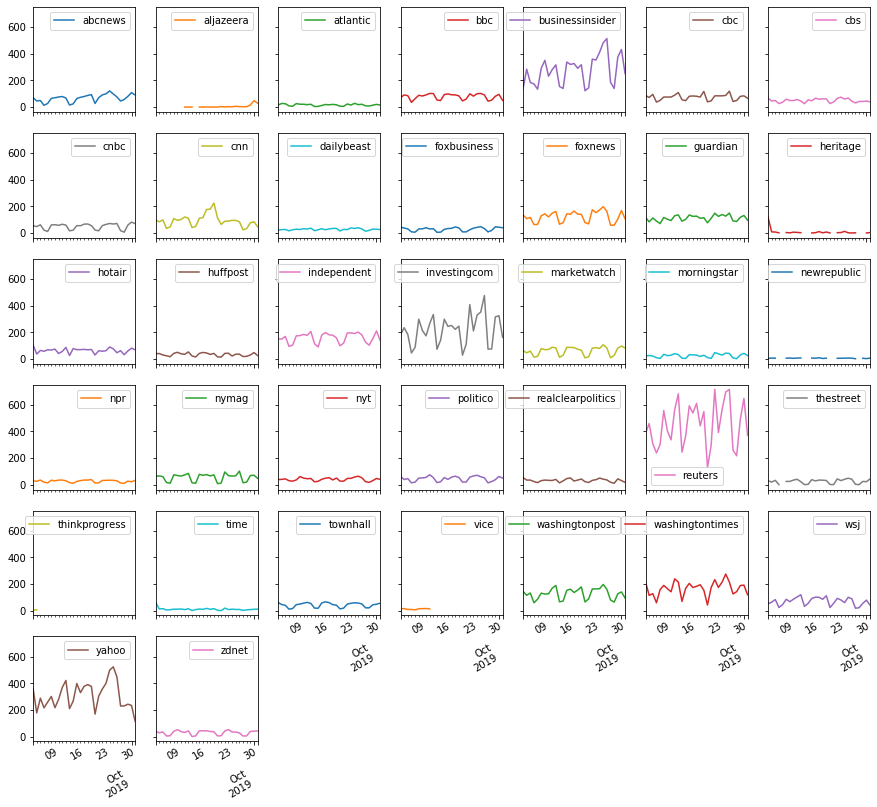

In [11]:
df_count.plot(subplots=True, layout=(6, 7), figsize=(15, 15), sharex=True, sharey=True);

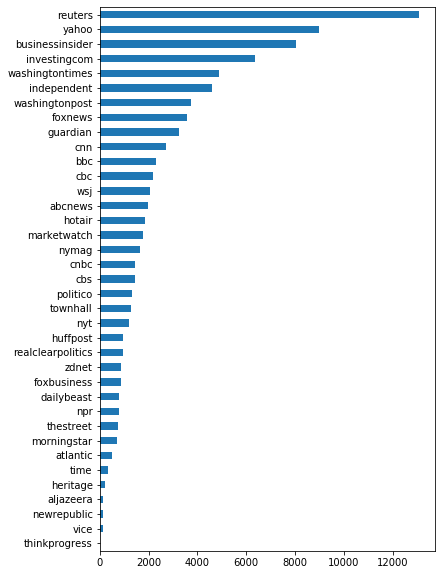

In [12]:
df_count.sum().sort_values().plot.barh(figsize=(6, 10));

# 일별 총 글자수 추이

In [13]:
publish_size = {}

for fname in tqdm(fnames):
    js = json.loads(Path(fname).read_text())
    pub = js['pub']
    published_at = js['published_at']
    size = len(js['text'])

    if pub not in publish_size:
        publish_size[pub] = {}
        
    if published_at not in publish_size[pub]:
        publish_size[pub][published_at] = 0
        
    publish_size[pub][published_at] += size

In [14]:
df_size = pd.DataFrame.from_dict(publish_size, orient='index').T.sort_index().iloc[-30:-1]
df_size.index = pd.to_datetime(df_size.index); df_size#['heritage']

,abcnews,aljazeera,atlantic,bbc,businessinsider,cbc,cbs,cnbc,cnn,dailybeast,...,thestreet,thinkprogress,time,townhall,vice,washingtonpost,washingtontimes,wsj,yahoo,zdnet
2019-09-04,246099.0,NaN,73898.0,290300.0,486382.0,373744.0,205258.0,149587.0,334324.0,135269.0,...,80144.0,22796.0,189118.0,239173.0,72053.0,797406.0,883485.0,164207.0,1213642.0,132824.0
2019-09-05,197578.0,NaN,168445.0,363445.0,956161.0,352332.0,161289.0,123221.0,324097.0,120720.0,...,56365.0,40086.0,69991.0,190855.0,67260.0,844056.0,378854.0,320802.0,560803.0,112775.0
2019-09-06,177591.0,1297.0,112605.0,458844.0,620281.0,425508.0,172292.0,151280.0,321285.0,116364.0,...,97191.0,NaN,58204.0,158166.0,46389.0,852927.0,374479.0,420877.0,892138.0,162313.0
2019-09-07,63649.0,NaN,52918.0,139188.0,598825.0,180272.0,72385.0,61058.0,147898.0,105935.0,...,8554.0,NaN,33299.0,42027.0,63772.0,372183.0,195088.0,125583.0,690729.0,16813.0
2019-09-08,127069.0,NaN,19357.0,261220.0,437166.0,221940.0,177503.0,28576.0,187944.0,208913.0,...,NaN,NaN,23940.0,58061.0,42544.0,541715.0,476886.0,230805.0,845625.0,20839.0
2019-09-09,198846.0,NaN,106960.0,357811.0,925929.0,310589.0,176551.0,219366.0,306941.0,127095.0,...,73200.0,NaN,49509.0,174184.0,59245.0,799227.0,648073.0,370637.0,1010428.0,127411.0
2019-09-10,250422.0,9503.0,76793.0,379691.0,1121303.0,332467.0,138233.0,174568.0,353585.0,125232.0,...,88314.0,NaN,44098.0,197582.0,70783.0,712468.0,507739.0,313307.0,704485.0,179555.0
2019-09-11,264389.0,NaN,121091.0,421692.0,910959.0,292454.0,201684.0,173773.0,380704.0,179653.0,...,124017.0,NaN,42483.0,228371.0,64233.0,835250.0,414040.0,443048.0,1012352.0,131376.0
2019-09-12,304782.0,7257.0,95302.0,396318.0,886304.0,354765.0,180226.0,153377.0,462888.0,132328.0,...,138632.0,NaN,52329.0,226641.0,56256.0,1168762.0,675754.0,383325.0,1175358.0,144565.0
2019-09-13,470981.0,1086.0,97772.0,433753.0,1044670.0,467143.0,131728.0,148958.0,389737.0,157383.0,...,94720.0,NaN,51355.0,212423.0,NaN,1221506.0,659378.0,540503.0,1453868.0,163487.0


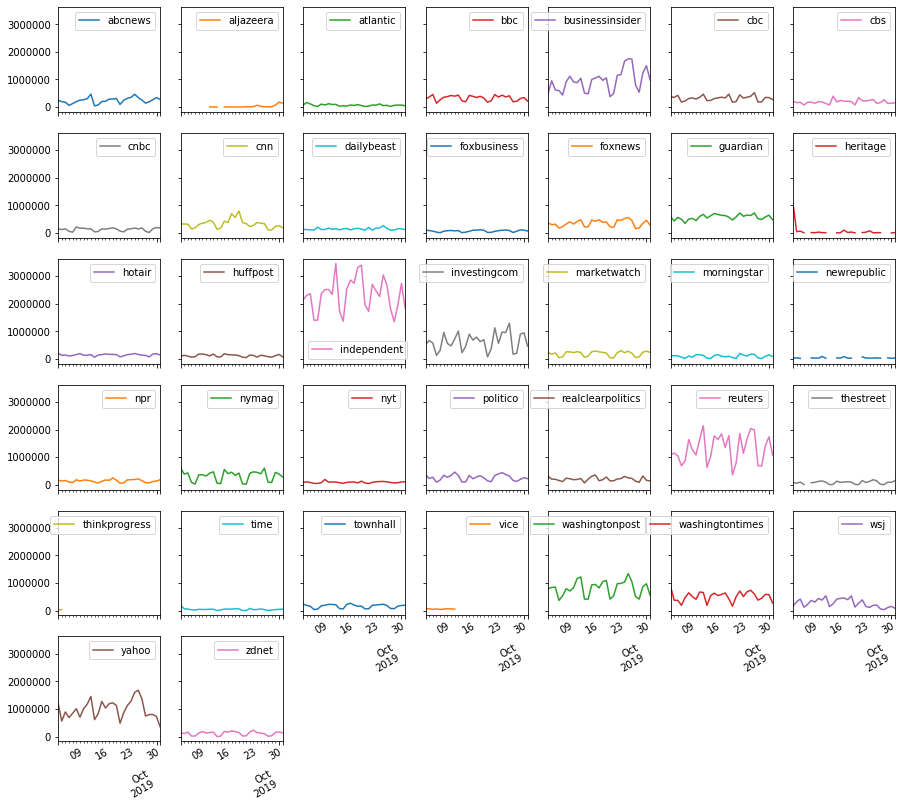

In [15]:
df_size.plot(subplots=True, layout=(6, 7), figsize=(15, 15), sharex=True, sharey=True);

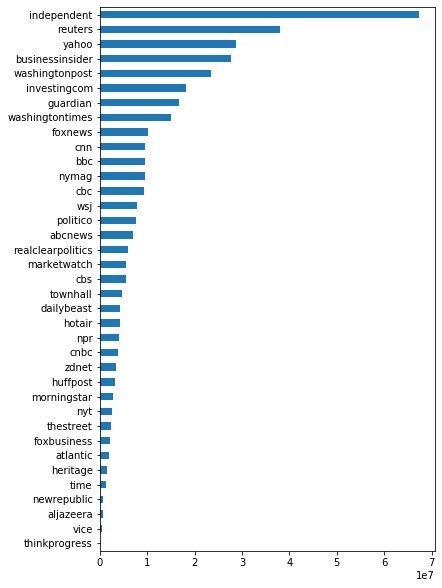

In [16]:
df_size.sum().sort_values().plot.barh(figsize=(6, 10));

In [17]:
(df_size.iloc[-10:].sum()/df_size.iloc[-10:].sum().sum()*100).sort_values()#.plot.barh(figsize=(6,10))

vice                  0.000000
thinkprogress         0.000000
heritage              0.126009
newrepublic           0.235519
time                  0.324054
aljazeera             0.403626
atlantic              0.491965
foxbusiness           0.604586
nyt                   0.722896
thestreet             0.771728
huffpost              0.796548
morningstar           0.858113
zdnet                 0.942545
cnbc                  1.049090
npr                   1.116347
hotair                1.125034
wsj                   1.129223
dailybeast            1.135000
townhall              1.292783
cbs                   1.460044
realclearpolitics     1.530716
marketwatch           1.570529
cnn                   1.867255
politico              2.098031
abcnews               2.203994
bbc                   2.464081
cbc                   2.518653
nymag                 2.714857
foxnews               2.906597
washingtontimes       4.122085
guardian              4.510661
investingcom          5.651299
washingt

# 일별 아티클당 평균 글자수 추이

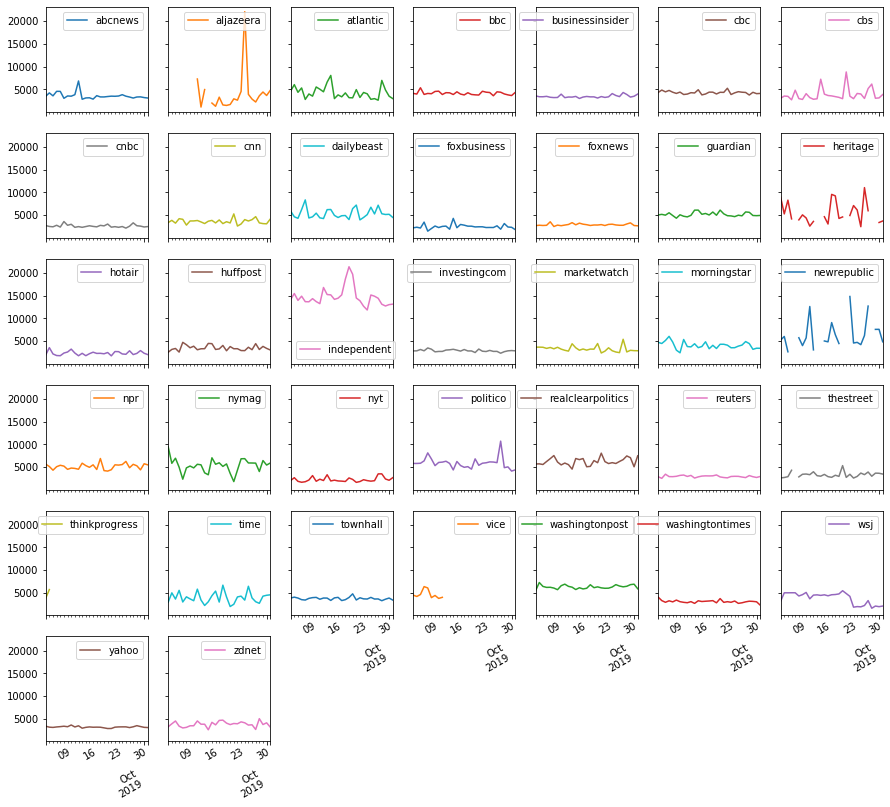

In [18]:
(df_size/df_count).plot(subplots=True, layout=(6, 7), figsize=(15, 15), sharex=True, sharey=True);

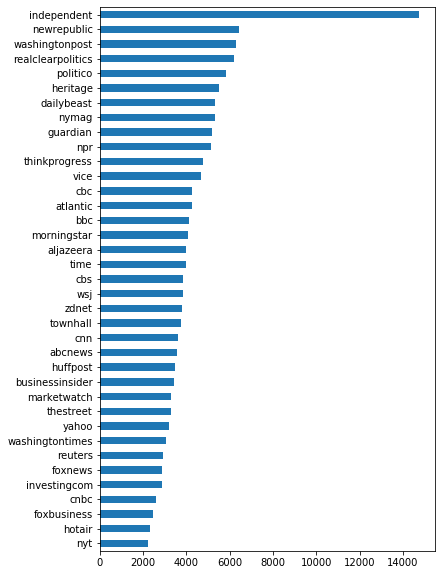

In [19]:
(df_size/df_count).mean().sort_values().plot.barh(figsize=(6, 10));

In [2]:
%load_ext autoreload
%autoreload
%matplotlib inline

from news_crawler import NewsCrawler, clean_url
from IPython.display import display
import os
import hashlib

In [3]:
fnames_downloaded = glob.glob('newsdata/downloaded/*.json')
fnames_trashed = glob.glob('newsdata/trashed/*/*.json')

In [27]:
fnames_int = set()
for fname in tqdm(fnames_trashed):
    js = json.loads(Path(fname).read_text())
    if js['pub'] in ['foxnews', 'foxbusiness']:
        fnames_int.add(fname)

In [26]:
for fname in tqdm(fnames_int):
    js = json.loads(Path(fname).read_text())
    js['pub'] = 'fox'
    with open(fname, 'w') as f:
        json.dump(js, f)

In [20]:
def makedir_if_not_exists(file):
    _dir = os.path.dirname(file)

    if not os.path.isdir(_dir):
        os.makedirs(_dir)

In [21]:
for fname in tqdm(fnames_trashed):
    file = Path(fname)
    js = json.loads(file.read_text())
    basename = os.path.basename(fname)
    fname_new = os.path.join('newsdata', 'trashed', basename[:3], basename)
    
    makedir_if_not_exists(fname_new)
    with open(fname_new, 'w') as f:
        json.dump(js, f)
     
    file.unlink()

In [4]:
urls_trashed = {} 

for fname in tqdm(fnames_trashed):
    js = json.loads(Path(fname).read_text())
    
    if 'error' in js: continue
    
    pub = js['pub']
    url = js['url']

    if pub not in urls_trashed:
        urls_trashed[pub] = set()

    urls_trashed[pub].add(url)

In [5]:
len(set.union(*urls_trashed.values()))

14375

In [7]:
crawler = NewsCrawler()

In [8]:
crawler.urls_selected = urls_trashed

In [ ]:
download_results = crawler.download2(); download_results

2.28% (309.94 seconds): downloading...

Building prefix dict from C:\ProgramData\Anaconda3\lib\site-packages\jieba\dict.txt ...
Loading model from cache C:\Users\Sejin\AppData\Local\Temp\jieba.cache
Loading model cost 7.121928930282593 seconds.
Prefix dict has been built succesfully.


8.29% (1845.47 seconds): downloading...

Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.


55.05% (19562.78 seconds): downloading...

In [9]:
crawler.urls_final

In [11]:
[hashlib.sha1(url.encode('utf-8')).hexdigest() for url in crawler.urls_final['cnn']['trashed']]

['4273aedcbce47874f8120bef3571bee4ef1c007b',
 '15acfa4614324846a1d8350f74130bc3c613b4f0',
 '98e774e632c6ad0fcc568f85c370d041290908b2',
 '2d4b0ec735fa93ee0b49c75072e8df1db7ca5e22',
 '26856b0c3a8b021e7378cc826d22e424b3ca1a5c',
 '509fe72ef7c70b2d1e11a8e008a27d865cbea948',
 'a21c45224a38c68ba4b2a1131bff36870a5e54c9',
 'ba37c527f979dfa7a9fb658f201ea9b6152a6b5f',
 '1dcb2b4dd89f1bf7659dbb6cbc0d9f0f31709fb8',
 'ee55fc4634a928934ece7347d287c1214d11a393',
 'c193accd024568981bc2d37b2e0c49cfc185e6c5',
 'f8f963d74d3b486b45515bc02b01168941d20a39',
 '981027a23403bf8b4d287554d3faf9df968dd0a9',
 '4a326c97680137b5bb62541928f0f9421f5d1e01',
 '0126d43e6e66a10eea1621e3cf3a794cae4d8b86',
 '92691c0b400f5ebcb6884a6cc2e4b73148e490d0',
 'd9fb9575c124e963ca42fba5cf0e49bc35918ccb',
 '6f8e6760aac051261a8bdd021a95037c1424513d',
 '015e1c4cbfb01e2f686cee8ccfd5ea61ff75e250',
 '1d59727430240414c07a4d80d9bd4c1f20c1154b',
 'bba5ea70062596eff62c5a8eebcc5fa2cbf8497f',
 '5f03dd3c8bafcf9f751fcc98d91c310054edc077',
 '74fbf2ba